In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
pd.set_option('Display.max_rows',None)
pd.set_option('Display.max_columns',None)
df_train = pd.read_csv('F:/loan_data_train.csv')
df_test = pd.read_csv('F:/loan_data_test.csv')

In [3]:
df_test.shape

(300, 14)

In [4]:
df_test['Interest.Rate'] = np.nan

In [5]:
df_train['data'] = 'train'
df_test['data'] = 'test'


In [6]:
concate = [df_train, df_test]

In [7]:
df = pd.concat(concate)

In [8]:
df.shape

(2500, 16)

In [9]:
df.size, df.shape

(40000, (2500, 16))

In [10]:
df['Interest.Rate'] = df['Interest.Rate'].str.replace('%','')

In [11]:
df.head()

ID Amount.Requested Amount.Funded.By.Investors Interest.Rate  \
0  79542.0            25000                      25000         18.49   
1  75473.0            19750                      19750         17.27   
2  67265.0             2100                       2100         14.33   
3  80167.0            28000                      28000         16.29   
4  17240.0            24250                   17431.82         12.23   

  Loan.Length        Loan.Purpose Debt.To.Income.Ratio State Home.Ownership  \
0   60 months  debt_consolidation               27.56%    VA       MORTGAGE   
1   60 months  debt_consolidation               13.39%    NY       MORTGAGE   
2   36 months      major_purchase                3.50%    LA            OWN   
3   36 months         credit_card               19.62%    NV       MORTGAGE   
4   60 months         credit_card               23.79%    OH       MORTGAGE   

   Monthly.Income FICO.Range Open.CREDIT.Lines Revolving.CREDIT.Balance  \
0         8606.56    720-724                11                    15210   
1         6737.50    710-714                14                    19070   
2         1000.00    690-694                13                      893   
3         7083.33    710-714                12                    38194   
4         5833.33    730-734                 6                    31061   

   Inquiries.in.the.Last.6.Months Employment.Length   data  
0                             3.0           5 years  train  
1                             3.0           4 years  train  
2                             1.0          < 1 year  train  
3                             1.0         10+ years  train  
4                             2.0         10+ years  train

In [12]:
df['Employment.Length'].value_counts()

10+ years    653
< 1 year     249
2 years      243
3 years      235
5 years      202
4 years      191
1 year       177
6 years      163
7 years      127
8 years      108
9 years       72
.              2
Name: Employment.Length, dtype: int64

In [13]:
df['Loan.Length'] = df['Loan.Length'].str.split(' ').str[0]

In [14]:
df.head()

ID Amount.Requested Amount.Funded.By.Investors Interest.Rate  \
0  79542.0            25000                      25000         18.49   
1  75473.0            19750                      19750         17.27   
2  67265.0             2100                       2100         14.33   
3  80167.0            28000                      28000         16.29   
4  17240.0            24250                   17431.82         12.23   

  Loan.Length        Loan.Purpose Debt.To.Income.Ratio State Home.Ownership  \
0          60  debt_consolidation               27.56%    VA       MORTGAGE   
1          60  debt_consolidation               13.39%    NY       MORTGAGE   
2          36      major_purchase                3.50%    LA            OWN   
3          36         credit_card               19.62%    NV       MORTGAGE   
4          60         credit_card               23.79%    OH       MORTGAGE   

   Monthly.Income FICO.Range Open.CREDIT.Lines Revolving.CREDIT.Balance  \
0         8606.56    720-724                11                    15210   
1         6737.50    710-714                14                    19070   
2         1000.00    690-694                13                      893   
3         7083.33    710-714                12                    38194   
4         5833.33    730-734                 6                    31061   

   Inquiries.in.the.Last.6.Months Employment.Length   data  
0                             3.0           5 years  train  
1                             3.0           4 years  train  
2                             1.0          < 1 year  train  
3                             1.0         10+ years  train  
4                             2.0         10+ years  train

In [15]:
df['Debt.To.Income.Ratio'] =  df['Debt.To.Income.Ratio'].str.replace('%','')

In [16]:
df['Employment.Length'].value_counts()

10+ years    653
< 1 year     249
2 years      243
3 years      235
5 years      202
4 years      191
1 year       177
6 years      163
7 years      127
8 years      108
9 years       72
.              2
Name: Employment.Length, dtype: int64

In [17]:
df['FICO_Lower']  = df['FICO.Range'].str.split('-').str[0].astype('int64')
df['FICO_Upper']  = df['FICO.Range'].str.split('-').str[1].astype('int64')

df

ID Amount.Requested Amount.Funded.By.Investors Interest.Rate  \
0      79542.0            25000                      25000         18.49   
1      75473.0            19750                      19750         17.27   
2      67265.0             2100                       2100         14.33   
3      80167.0            28000                      28000         16.29   
4      17240.0            24250                   17431.82         12.23   
5      32737.0             5400                       5375          8.90   
6      71685.0            16000                      16000         22.47   
7      38028.0             6400                       6400          7.51   
8      32119.0            24000                   23772.15         12.99   
9      84563.0             8000                       8000          7.62   
10     78765.0             9000                       9000         10.16   
11     24590.0            13000                      12975          9.99   
12      9061.0            10000                      10000         14.22   
13     47011.0             3600                       3600         13.67   
14     21789.0             7350                       7350         10.74   
15     29653.0            17000                      16975         11.99   
16    100440.0            18825                      18825         21.00   
17     88526.0             4200                       4200         17.27   
18    101715.0             5000                    1750.04         11.54   
19    103374.0             3700                       3600          7.88   
20     77844.0             6625                       6625         17.77   
21     75012.0            15000                      15000         12.12   
22     73179.0            29175                      29175         21.00   
23      3162.0             6000                       6000         11.89   
24      2386.0            10000                      10000         13.47   
25     57120.0            22000                      22000         14.65   
26     99360.0            18000                      18000         24.89   
27     54619.0            12000                      11875          8.90   
28     50633.0            24000                      24000          7.62   
29     48560.0             5000                       5000         12.12   
30      2148.0             6500                    5329.76         11.89   
31     10441.0             4000                       3925         11.49   
32    103448.0            16000                      15825         16.82   
33     14052.0             7300                       7300          7.88   
34     13863.0            25000                      20850         15.58   
35     81254.0            19400                      19400         23.28   
36     61835.0            11625                      11625         15.80   
37     51625.0            10000                      10000         12.12   
38     18629.0            24000                      24000          6.54   
39     73376.0             3000                       3000         11.14   
40     34961.0            19000                      19000         11.71   
41    103249.0             2500                       2500         15.31   
42     82112.0            12000                      12000         12.12   
43       457.0            17350                    7019.25         13.55   
44     11779.0            24000                   14860.05         13.61   
45     34144.0            21000                      21000         14.27   
46     95951.0            12000                      12000         13.11   
47      1034.0             5000                          0          8.63   
48      2645.0             5000                       5000          9.32   
49     28738.0            20000                   18126.99         11.99   
50     30600.0            12000                      12000         16.89   
51     72499.0             8000                       8000  

In [18]:
df['FICO'] = df[['FICO_Upper','FICO_Lower']].mean(axis = 1)

In [19]:
df = df.drop(['FICO.Range','FICO_Lower','FICO_Upper','ID','Amount.Funded.By.Investors'],axis = 1)

In [20]:
df['Employment.Length'].dtype

dtype('O')

In [21]:
df['Employment.Length'] = df['Employment.Length'].str.replace('year', '')

In [22]:
df['Employment.Length'] = df['Employment.Length'].str.replace('years','')

In [23]:
df['Employment.Length'] = df['Employment.Length'].str.replace('s','')

In [24]:
df['Employment.Length'] = df['Employment.Length'].str.replace('+','')

In [25]:
df['Employment.Length'] = df['Employment.Length'].str.replace('<','')

In [26]:
df['Employment.Length'] = pd.to_numeric(df['Employment.Length'], errors = 'coerce')

In [27]:
df_cat = df.select_dtypes(include = 'object')
df_cat.columns

Index(['Amount.Requested', 'Interest.Rate', 'Loan.Length', 'Loan.Purpose',
       'Debt.To.Income.Ratio', 'State', 'Home.Ownership', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'data'],
      dtype='object')

In [28]:
df_cat = ['Amount.Requested', 'Interest.Rate', 'Loan.Length', 'Loan.Purpose',
       'Debt.To.Income.Ratio', 'State', 'Home.Ownership', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Employment.Length']

In [29]:
df_cat = df[['Loan.Length','Loan.Purpose','Home.Ownership','State']]

In [30]:
df = pd.get_dummies(df, columns = ['Loan.Length','Loan.Purpose','Home.Ownership','State'], drop_first = True)

In [31]:
df.shape

(2500, 75)

In [32]:
df.isnull().sum().sort_values(ascending = False)

Interest.Rate                      300
Employment.Length                   80
Open.CREDIT.Lines                    4
Monthly.Income                       3
Revolving.CREDIT.Balance             3
Inquiries.in.the.Last.6.Months       3
Amount.Requested                     1
Debt.To.Income.Ratio                 1
Home.Ownership_RENT                  0
Loan.Purpose_vacation                0
Loan.Purpose_wedding                 0
Home.Ownership_NONE                  0
Home.Ownership_OTHER                 0
Home.Ownership_OWN                   0
State_AZ                             0
State_AK                             0
State_AL                             0
State_AR                             0
Loan.Purpose_renewable_energy        0
State_CA                             0
State_CO                             0
Loan.Purpose_small_business          0
Loan.Purpose_major_purchase          0
Loan.Purpose_other                   0
Loan.Purpose_moving                  0
Loan.Purpose_medical     

In [33]:
df['Employment.Length'].value_counts()

10.0    653
1.0     426
2.0     243
3.0     235
5.0     202
4.0     191
6.0     163
7.0     127
8.0     108
9.0      72
Name: Employment.Length, dtype: int64

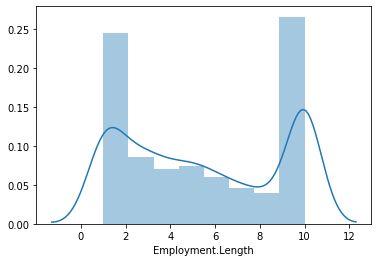

In [34]:
sns.distplot(df['Employment.Length'])

In [35]:
df['Employment.Length'].skew()

0.1167150419269063

In [36]:
df['Employment.Length'] = df['Employment.Length'].fillna(value = df['Employment.Length'].median())

In [37]:
df['Monthly.Income'] = df['Monthly.Income'].fillna(value = df['Monthly.Income'].median())

In [75]:
df['Open.CREDIT.Lines'] = df['Open.CREDIT.Lines'].fillna(df['Open.CREDIT.Lines'].median())

In [86]:
df['Open.CREDIT.Lines'].isnull().value_counts()

False    2500
Name: Open.CREDIT.Lines, dtype: int64

In [90]:
df['Revolving.CREDIT.Balance'] = df['Revolving.CREDIT.Balance'].fillna(df['Revolving.CREDIT.Balance'].median())

In [95]:
df['Revolving.CREDIT.Balance'].isnull().value_counts()

False    2500
Name: Revolving.CREDIT.Balance, dtype: int64

In [40]:
df['Inquiries.in.the.Last.6.Months'] = df['Inquiries.in.the.Last.6.Months'].fillna(method = 'ffill')

In [41]:
df['Amount.Requested'] = pd.to_numeric(df['Amount.Requested'], errors = 'coerce')

In [42]:
df['Amount.Requested'] = df['Amount.Requested'].fillna(value = df['Amount.Requested'].median())

In [43]:
df['Debt.To.Income.Ratio'] = df['Debt.To.Income.Ratio'].fillna(value = df['Debt.To.Income.Ratio'].median())

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 299
Data columns (total 75 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Amount.Requested                 2500 non-null   float64
 1   Interest.Rate                    2200 non-null   float64
 2   Debt.To.Income.Ratio             2500 non-null   float64
 3   Monthly.Income                   2500 non-null   float64
 4   Open.CREDIT.Lines                2500 non-null   float64
 5   Revolving.CREDIT.Balance         2500 non-null   float64
 6   Inquiries.in.the.Last.6.Months   2500 non-null   float64
 7   Employment.Length                2500 non-null   float64
 8   data                             2500 non-null   object 
 9   FICO                             2500 non-null   float64
 10  Loan.Length_36                   2500 non-null   uint8  
 11  Loan.Length_60                   2500 non-null   uint8  
 12  Loan.Purpose_credit_c

In [57]:
df['Revolving.CREDIT.Balance'].dtype

dtype('float64')

In [58]:
grouped = df.groupby('data')

In [59]:
#Splitting the data into test and train data 

In [97]:
df_test1 = grouped.get_group('test')

In [98]:
df_train1 = grouped.get_group('train')

In [62]:
pd.DataFrame(df_test.columns, columns = ['columns'])

columns
0                  Amount.Requested
1                     Interest.Rate
2              Debt.To.Income.Ratio
3                    Monthly.Income
4                 Open.CREDIT.Lines
5          Revolving.CREDIT.Balance
6    Inquiries.in.the.Last.6.Months
7                 Employment.Length
8                              data
9                              FICO
10                   Loan.Length_36
11                   Loan.Length_60
12         Loan.Purpose_credit_card
13  Loan.Purpose_debt_consolidation
14         Loan.Purpose_educational
15    Loan.Purpose_home_improvement
16               Loan.Purpose_house
17      Loan.Purpose_major_purchase
18             Loan.Purpose_medical
19              Loan.Purpose_moving
20               Loan.Purpose_other
21    Loan.Purpose_renewable_energy
22      Loan.Purpose_small_business
23            Loan.Purpose_vacation
24             Loan.Purpose_wedding
25              Home.Ownership_NONE
26             Home.Ownership_OTHER
27               Home.Ownership_OWN
28              Home.Ownership_RENT
29                         State_AK
30                         State_AL
31                         State_AR
32                         State_AZ
33                         State_CA
34                         State_CO
35                         State_CT
36                         State_DC
37                         State_DE
38                         State_FL
39                         State_GA
40                         State_HI
41                         State_IA
42                         State_IL
43                         State_IN
44                         State_KS
45                         State_KY
46                         State_LA
47                         State_MA
48                         State_MD
49                         State_MI
50                         State_MN
51                         State_MO
52                         State_MS
53                         State_MT
54                         State_NC
55                         State_NH
56                         State_NJ
57                         State_NM
58                         State_NV
59                         State_NY
60                         State_OH
61                         State_OK
62                         State_OR
63                         State_PA
64                         State_RI
65                         State_SC
66                         State_SD
67                         State_TX
68                         State_UT
69                         State_VA
70                         State_VT
71                         State_WA
72                         State_WI
73                         State_WV
74                         State_WY

In [78]:
df_test.drop(['data', 'Interest.Rate'], axis = 1)

Amount.Requested  Debt.To.Income.Ratio  Monthly.Income  \
0              5000.0                 12.59         4416.67   
1             18000.0                  4.93         5258.50   
2              7200.0                 25.16         3750.00   
3              7200.0                 17.27         3416.67   
4             22000.0                 18.28         6083.33   
5              6000.0                  2.52         4800.00   
6              9800.0                 12.89         2708.33   
7              6000.0                  8.81         2462.75   
8              3000.0                 10.05         9166.67   
9             17500.0                 21.63         3666.67   
10            25000.0                 13.45         6750.00   
11             9950.0                  7.84         2833.33   
12            10000.0                  8.80         4000.00   
13             4000.0                 10.56         1600.00   
14             9500.0                  8.82         5416.67   
15             6500.0                 19.63         4100.00   
16             4000.0                 13.16         5166.67   
17            10000.0                 27.53         2916.67   
18            20000.0                 21.44         6250.00   
19             5600.0                 25.29         3333.33   
20            33600.0                 19.11         7666.67   
21            16000.0                 24.85         5416.67   
22             6700.0                 21.53         4700.00   
23            12000.0                 10.69         4416.67   
24             7000.0                 12.61         6250.00   
25            10000.0                 20.27         6666.67   
26             6000.0                 17.86         4980.00   
27            25000.0                  8.76         6250.00   
28            11000.0                 16.57         5000.00   
29            20000.0                 24.58         6000.00   
30             6400.0                  3.09         6250.00   
31             5500.0                  3.58        12000.00   
32            10000.0                  9.14         5416.67   
33             4000.0                 22.74         1666.67   
34             4000.0                 22.15         2000.00   
35            12000.0                 16.29         6250.00   
36            35000.0                 15.30         9000.00   
37             9000.0                 18.93         3750.00   
38             7000.0                 23.02         6000.00   
39            27000.0                 17.82         7083.33   
40            10000.0                  8.40         4133.33   
41             4750.0                 32.49         3500.00   
42            12700.0                 23.94         3333.33   
43            18825.0                 13.08         4000.00   
44            17600.0                 17.35         7500.00   
45            19125.0                  9.10         4166.67   
46            19000.0                 16.06         5000.00   
47             3500.0                 10.19         3750.00   
48            20000.0                 12.20         6666.67   
49            10000.0                 11.64        12083.33   
50            10000.0                 24.47         3583.33   
51            13750.0                 22.01         2916.67   
52             8450.0                 12.73         1375.00   
53            24625.0                 20.96         5166.67   
54            30000.0                 20.28        13666.67   
55            24000.0                 21.59        10000.00   
56            25000.0                 10.53         6250.00   
57            15000.0                 26.75         7666.67   
58            15000.0                 22.39         7500.00   
59             7200.0                  2.18         3250.00   
60             6000.0                 12.40         1000.00   
61            35000.0                 20.56         5666.67   
62            14000.0               

In [100]:
df_train1 = df_train1.drop('data', axis = 1)

In [101]:
import statsmodels.api as sm

In [223]:
X = df_train1.drop('Interest.Rate', axis = 1)
y = df_train1['Interest.Rate']

Xc = sm.add_constant(X)

In [226]:
y.shape

(2200,)

In [225]:
df_train1.head()

Amount.Requested  Interest.Rate  Debt.To.Income.Ratio  Monthly.Income  \
0           25000.0          18.49                 27.56         8606.56   
1           19750.0          17.27                 13.39         6737.50   
2            2100.0          14.33                  3.50         1000.00   
3           28000.0          16.29                 19.62         7083.33   
4           24250.0          12.23                 23.79         5833.33   

   Open.CREDIT.Lines  Revolving.CREDIT.Balance  \
0               11.0                   15210.0   
1               14.0                   19070.0   
2               13.0                     893.0   
3               12.0                   38194.0   
4                6.0                   31061.0   

   Inquiries.in.the.Last.6.Months  Employment.Length   FICO  Loan.Length_36  \
0                             3.0                5.0  722.0               0   
1                             3.0                4.0  712.0               0   
2                             1.0                1.0  692.0               1   
3                             1.0               10.0  712.0               1   
4                             2.0               10.0  732.0               0   

   Loan.Length_60  Loan.Purpose_credit_card  Loan.Purpose_debt_consolidation  \
0               1                         0                                1   
1               1                         0                                1   
2               0                         0                                0   
3               0                         1                                0   
4               1                         1                                0   

   Loan.Purpose_educational  Loan.Purpose_home_improvement  \
0                         0                              0   
1                         0                              0   
2                         0                              0   
3                         0                              0   
4                         0                              0   

   Loan.Purpose_house  Loan.Purpose_major_purchase  Loan.Purpose_medical  \
0                   0                            0                     0   
1                   0                            0                     0   
2                   0                            1                     0   
3                   0                            0                     0   
4                   0                            0                     0   

   Loan.Purpose_moving  Loan.Purpose_other  Loan.Purpose_renewable_energy  \
0                    0                   0                              0   
1                    0                   0                              0   
2                    0                   0                              0   
3                    0                   0                              0   
4                    0                   0                              0   

   Loan.Purpose_small_business  Loan.Purpose_vacation  Loan.Purpose_wedding  \
0                            0                      0                     0   
1                            0                      0                     0   
2                            0                      0                     0   
3                            0                      0                     0   
4                            0                      0                     0   

   Home.Ownership_NONE  Home.Ownership_OTHER  Home.Ownership_OWN  \
0                    0                     0                   0   
1                    0                     0                   0   
2                    0                     0                   1   
3                    0                     0                   0   
4                    0                     0                   0   

   Home.Ownership_RENT  State_AK  State_AL  State_AR  State_AZ  State_CA  \
0                    0         0    

In [105]:
model = sm.OLS(y, Xc).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Interest.Rate   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     98.25
Date:                Mon, 25 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:23:57   Log-Likelihood:                -4653.3
No. Observations:                2200   AIC:                             9453.
Df Residuals:                    2127   BIC:                             9868.
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              72.6072      2.342     30.996      0.000      68.013      77.201
Amount.Requested                    0.0002    7.2e-06     22.276      0.000       0.000       0.000
Debt.To.Income.Ratio                0.0004      0.007      0.053      0.957      -0.013       0.014
Monthly.Income                  -2.468e-05   1.31e-05     -1.888      0.059   -5.03e-05    9.53e-07
Open.CREDIT.Lines                  -0.0375      0.011     -3.321      0.001      -0.060      -0.015
Revolving.CREDIT.Balance         -2.96e-06   2.72e-06     -1.089      0.276   -8.29e-06    2.37e-06
Inquiries.in.the.Last.6.Months      0.3533      0.037      9.484      0.000       0.280       0.426
Employment.Length                   0.0182      0.014      1.345      0.179      -0.008       0.045
FICO                               -0.0864      0.001    -64.058      0.000      -0.089      -0.084
Loan.Length_36                      1.3062      1.484      0.880      0.379      -1.604       4.216
Loan.Length_60                      4.4663      1.487      3.004      0.003       1.550       7.382
Loan.Purpose_credit_card           -0.3429      0.328     -1.045      0.296      -0.986       0.300
Loan.Purpose_debt_consolidation    -0.2142      0.316     -0.677      0.498      -0.835       0.406
Loan.Purpose_educational            0.3094      0.631      0.490      0.624      -0.928       1.547
Loan.Purpose_home_improvement      -0.1350      0.357     -0.379      0.705      -0.834       0.564
Loan.Purpose_house                  0.4530      0.563      0.804      0.421      -0.652       1.558
Loan.Purpose_major_purchase         0.1077      0.379      0.284      0.776      -0.635       0.850
Loan.Purpose_medical               -0.0063      0.509     -0.012      0.990      -1.004       0.992
Loan.Purpose_moving                 1.2445      0.515      2.417      0.016       0.235       2.254
Loan.Purpose_other                  0.5856      0.345      1.698      0.090      -0.091       1.262
Loan.Purpose_renewable_energy       0.2912      1.231      0.237      0.813      -2.123       2.705
Loan.Purpose_small_business         0.2425      0.384      0.631      0.528      -0.511       0.996
Loan.Purpose_vacation               0.7690      0.571      1.346      0.179      -0.352       1.890
Loan.Purpose_wedding               -0.4483      0.464     -0.966      0.334      -1.359       0.462
Home.Ownership_NONE                 4.1570      2.057      2.021      0.043       0.123       8.191
Home.Ownership_OTHER                1.1789      1.193      0.989      0.323      -1.160       3.517
Home.Ownership_OWN                  0.3507      0.172      2.034      0.042       0.013       0.689
Home.Ownership_RENT                 0.2154      0.104      2.067      0.039       0

In [108]:
from sklearn.model_selection import KFold, GridSearchCV

In [109]:
from sklearn.feature_selection import RFE

In [110]:
folds = KFold(n_splits = 3, shuffle = True, random_state = 42)

In [111]:
df_train.shape

(2200, 74)

In [113]:
params = [{'n_features_to_select' : list(range(1,73))}]

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [228]:
X_train.shape, y_train.shape

((1540, 73), (1540,))

In [148]:
lr = LinearRegression()
lr.fit(X,y)
rfe = RFE(lr, n_features_to_select = 70)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=70)

In [146]:
gsearch = GridSearchCV(rfe, param_grid = params, cv = 3, verbose = 3, return_train_score = True) 

In [147]:
gsearch.fit(X_train,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV 1/3] END .........................n_features_to_select=1; total time=   0.0s
[CV 2/3] END .........................n_features_to_select=1; total time=   0.0s
[CV 3/3] END .........................n_features_to_select=1; total time=   0.0s
[CV 1/3] END .........................n_features_to_select=2; total time=   0.0s
[CV 2/3] END .........................n_features_to_select=2; total time=   0.0s
[CV 3/3] END .........................n_features_to_select=2; total time=   0.0s
[CV 1/3] END .........................n_features_to_select=3; total time=   0.0s
[CV 2/3] END .........................n_features_to_select=3; total time=   0.0s
[CV 3/3] END .........................n_features_to_select=3; total time=   0.0s
[CV 1/3] END .........................n_features_to_select=4; total time=   0.0s
[CV 2/3] END .........................n_features_to_select=4; total time=   0.0s
[CV 3/3] END .........................n_feature

[CV 2/3] END ........................n_features_to_select=35; total time=   0.0s
[CV 3/3] END ........................n_features_to_select=35; total time=   0.0s
[CV 1/3] END ........................n_features_to_select=36; total time=   0.0s
[CV 2/3] END ........................n_features_to_select=36; total time=   0.0s
[CV 3/3] END ........................n_features_to_select=36; total time=   0.0s
[CV 1/3] END ........................n_features_to_select=37; total time=   0.0s
[CV 2/3] END ........................n_features_to_select=37; total time=   0.0s
[CV 3/3] END ........................n_features_to_select=37; total time=   0.0s
[CV 1/3] END ........................n_features_to_select=38; total time=   0.0s
[CV 2/3] END ........................n_features_to_select=38; total time=   0.0s
[CV 3/3] END ........................n_features_to_select=38; total time=   0.0s
[CV 1/3] END ........................n_features_to_select=39; total time=   0.0s
[CV 2/3] END ...............

[CV 1/3] END ........................n_features_to_select=69; total time=   0.0s
[CV 2/3] END ........................n_features_to_select=69; total time=   0.0s
[CV 3/3] END ........................n_features_to_select=69; total time=   0.0s
[CV 1/3] END ........................n_features_to_select=70; total time=   0.0s
[CV 2/3] END ........................n_features_to_select=70; total time=   0.0s
[CV 3/3] END ........................n_features_to_select=70; total time=   0.0s
[CV 1/3] END ........................n_features_to_select=71; total time=   0.0s
[CV 2/3] END ........................n_features_to_select=71; total time=   0.0s
[CV 3/3] END ........................n_features_to_select=71; total time=   0.0s
[CV 1/3] END ........................n_features_to_select=72; total time=   0.0s
[CV 2/3] END ........................n_features_to_select=72; total time=   0.0s
[CV 3/3] END ........................n_features_to_select=72; total time=   0.0s


GridSearchCV(cv=3,
             estimator=RFE(estimator=LinearRegression(),
                           n_features_to_select=70),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, verbose=3)

In [131]:
gsearch.best_params_

{'n_features_to_select': 70}

In [140]:
from sklearn.metrics import r2_score, mean_squared_error

In [149]:
y_train_pred = rfe.predict(X_train)

In [150]:
y_test_pred = rfe.predict(X_test)

In [151]:
r2_score(y_train,y_train_pred)

0.772920345974923

In [152]:
r2_score(y_test,y_test_pred)

0.7413268544212382

In [153]:
np.sqrt(mean_squared_error(y_train,y_train_pred))

2.0094932616390433

In [154]:
from sklearn.linear_model import Lasso 

In [155]:
lasso = Lasso(alpha = 0.05)
lasso.fit(X_train, y_train)

Lasso(alpha=0.05)

In [168]:
lasso_values = pd.DataFrame(lasso.coef_, index = X_train.columns).sort_values(by = 0)
lasso_values

0
FICO                            -0.087807
Open.CREDIT.Lines               -0.037395
Monthly.Income                  -0.000028
Revolving.CREDIT.Balance        -0.000002
State_FL                        -0.000000
State_NC                        -0.000000
State_MT                        -0.000000
State_MS                         0.000000
State_MO                        -0.000000
State_MN                        -0.000000
State_MI                        -0.000000
State_LA                         0.000000
State_MA                         0.000000
State_NH                         0.000000
State_KY                        -0.000000
State_KS                         0.000000
State_IN                        -0.000000
State_IL                        -0.000000
State_MD                         0.000000
State_NJ                        -0.000000
State_NY                         0.000000
State_NV                        -0.000000
State_WI                         0.000000
State_WA                        -0.000000
State_VT                         0.000000
State_VA                         0.000000
State_UT                        -0.000000
State_TX                         0.000000
State_NM                        -0.000000
State_SD                        -0.000000
State_RI                        -0.000000
State_PA                        -0.000000
State_OR                         0.000000
State_OK                        -0.000000
State_OH                        -0.000000
State_IA                         0.000000
State_SC                         0.000000
State_HI                         0.000000
State_WY                        -0.000000
State_WV                        -0.000000
Debt.To.Income.Ratio            -0.000000
Loan.Length_36                  -0.000000
Loan.Purpose_credit_card        -0.000000
Loan.Purpose_debt_consolidation -0.000000
Loan.Purpose_educational         0.000000
Loan.Purpose_home_improvement   -0.000000
Loan.Purpose_house               0.000000
Loan.Purpose_major_purchase      0.000000
Loan.Purpose_medical            -0.000000
Loan.Purpose_moving              0.000000
Loan.Purpose_renewable_energy    0.000000
State_GA                        -0.000000
Loan.Purpose_vacation            0.000000
Loan.Purpose_small_business      0.000000
Home.Ownership_NONE              0.000000
State_DE                        -0.000000
State_DC                        -0.000000
State_CT                         0.000000
State_CO                         0.000000
Loan.Purpose_wedding            -0.000000
State_AZ                         0.000000
State_CA                        -0.000000
State_AL                        -0.000000
State_AK                         0.000000
Home.Ownership_RENT              0.000000
Home.Ownership_OWN               0.000000
Home.Ownership_OTHER             0.000000
State_AR                        -0.000000
Amount.Requested                 0.000162
Employment.Length                0.003097
Loan.Purpose_other               0.005259
Inquiries.in.the.Last.6.Months   0.287416
Loan.Length_60                   2.928525

In [ ]:
Inquiries.in.the.Last.6.Months
Loan.Length_60
Loan.Purpose_other
Employment.Length
Amount.Requested

In [ ]:
FICO
Open.CREDIT.Lines
Monthly.Income
Revolving.CREDIT.Balance

In [176]:
list2 = []

In [183]:
for i in lasso_values[0] :
    
    if (i > 0) :
        
        list2.append(i)
    else :
        pass 

In [184]:
list2

[0.00016242176298884872,
 0.003096508866683994,
 0.0052591968443798385,
 0.2874161376497169,
 2.928525332725829]

In [185]:
list(zip(X))

In [188]:
for i in lasso_values[0] :
    
    if (i < 0) :
        
        list3.append(i)
    else :
        pass 

In [189]:
list3

[-0.08780710145769628,
 -0.03739461014349673,
 -2.790083211695973e-05,
 -2.418473801017134e-06]

In [234]:
X = X_train[['Inquiries.in.the.Last.6.Months',
'Loan.Length_60',
'Loan.Purpose_other',
'Employment.Length',
'Amount.Requested','FICO',
'Open.CREDIT.Lines',
'Monthly.Income',
'Revolving.CREDIT.Balance']]

In [242]:
X

Inquiries.in.the.Last.6.Months  Loan.Length_60  Loan.Purpose_other  \
1102                             4.0               1                   0   
1159                             2.0               0                   0   
141                              0.0               0                   0   
1004                             0.0               0                   0   
2                                1.0               0                   0   
576                              2.0               0                   0   
1533                             1.0               0                   0   
339                              0.0               0                   0   
874                              1.0               0                   0   
265                              1.0               0                   0   
376                              1.0               1                   0   
1928                             0.0               1                   0   
439                              0.0               0                   0   
271                              3.0               1                   0   
244                              3.0               1                   0   
1436                             3.0               1                   0   
1273                             0.0               0                   0   
816                              0.0               0                   0   
1564                             0.0               1                   1   
607                              0.0               1                   0   
415                              0.0               0                   0   
273                              1.0               0                   0   
1975                             0.0               0                   0   
250                              0.0               0                   0   
413                              2.0               1                   0   
1292                             0.0               0                   0   
1546                             0.0               0                   0   
310                              0.0               0                   0   
781                              1.0               0                   1   
765                              0.0               0                   0   
425                              0.0               0                   0   
2134                             2.0               0                   0   
839                              2.0               0                   0   
1925                             0.0               0                   0   
1602                             0.0               0                   0   
965                              0.0               1                   0   
1639                             4.0               0                   0   
1512                             1.0               1                   0   
526                              1.0               1                   0   
2186                             3.0               1                   0   
893                              3.0               0                   0   
182                              1.0               1                   0   
170                              0.0               0                   0   
997                              0.0               0                   0   
1433                             0.0               0                   0   
187                              0.0               0                   0   
619                              1.0               0                   0   
2006                             0.0               0                   0   
158                              1.0               0                   0   
879                              0.0               0                   0   
272                              0.0               0                   0   
614                              1.0               0  

In [236]:
y_train.shape

(1540,)

In [239]:
lasso = Lasso(alpha = 0.05)
lasso.fit(X,y_train)

Lasso(alpha=0.05)

In [243]:
y_pred = lasso.predict(X)
y_pred.shape

(1540,)

In [244]:
y_train.shape

(1540,)

In [245]:
np.sqrt(mean_squared_error(y_train,y_pred))

2.092555100191487

In [246]:
r2_score(y_train,y_pred)

0.7537598197864773